In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.random.seed(100)

In [4]:
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34417,0.36362,0.80583,0.16045,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36348,0.35374,0.69609,0.24854,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.19636,0.18940,0.43727,0.24831,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20000,0.21212,0.59044,0.16030,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.22696,0.22927,0.43696,0.18690,82,1518,1600


In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day['temp'] = day['temp']*41
hour['temp'] = hour['temp']*41

day['atemp'] = day['atemp']*50
hour['atemp'] = hour['atemp']*50

day['hum'] = day['hum']*100
hour['hum'] = hour['hum']*100

day['windspeed'] = day['windspeed']*67
hour['windspeed'] = hour['windspeed']*67





In [7]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05092,9.47025,43.72730,16.63670,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20000,10.60610,59.04350,10.73983,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.30524,11.46350,43.69570,12.52230,82,1518,1600


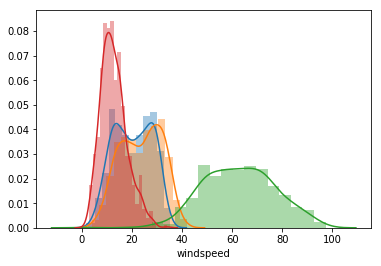

In [8]:
 for i in day.select_dtypes(include='float'):
        sns.distplot(day[i])
        plt.show

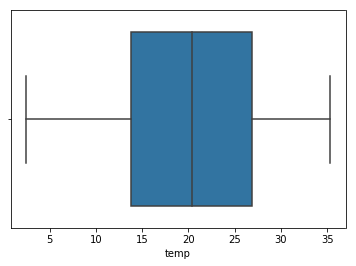

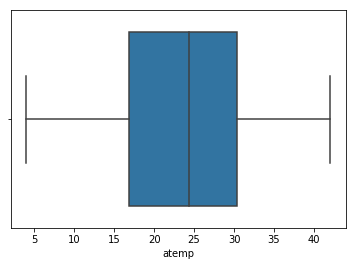

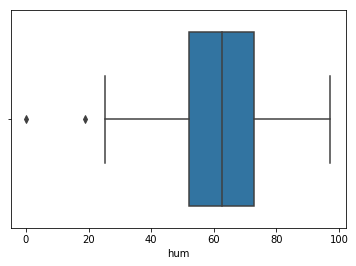

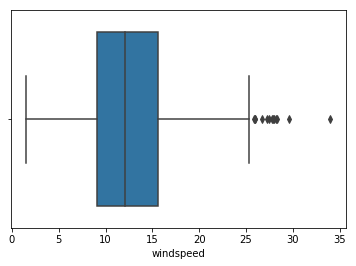

In [9]:
for i in day.select_dtypes(include='float'):
    sns.boxplot(day[i])
    plt.show()

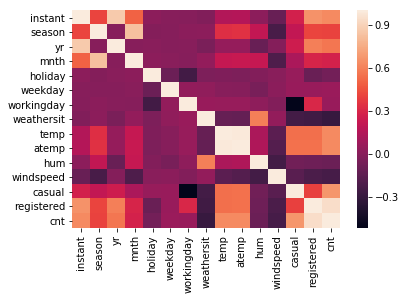

In [11]:
sns.heatmap(day.corr())

In [13]:
day.corr()['cnt']

instant       0.62883
season        0.40610
yr            0.56671
mnth          0.27998
holiday      -0.06835
weekday       0.06744
workingday    0.06116
weathersit   -0.29739
temp          0.62749
atemp         0.63107
hum          -0.10066
windspeed    -0.23454
casual        0.67280
registered    0.94552
cnt           1.00000
Name: cnt, dtype: float64

In [15]:
hour.corr()['cnt']

instant       0.27838
season        0.17806
yr            0.25049
mnth          0.12064
hr            0.39407
holiday      -0.03093
weekday       0.02690
workingday    0.03028
weathersit   -0.14243
temp          0.40477
atemp         0.40093
hum          -0.32291
windspeed     0.09323
casual        0.69456
registered    0.97215
cnt           1.00000
Name: cnt, dtype: float64

In [16]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05092,9.47025,43.72730,16.63670,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20000,10.60610,59.04350,10.73983,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.30524,11.46350,43.69570,12.52230,82,1518,1600


In [23]:
def get_df_name(df):
    '''
    This Function returns the name of a dataset
    '''
    
    name = [x for x in globals() if globals()[x] is df][0]
    return name

def plot_stack_bar_chart(data,col,name):
    plt.figure(figsize=(12,8))
    p1 = plt.bar(data[col].unique(),
                 data.groupby([col])['casual'].sum())
    
    p2 = plt.bar(data[col].unique(),
                data.groupby([col])['registered'].sum(),
                bottom = data.groupby([col])['casual'].sum())
    
    plt.ylabel('Count')
    plt.title("Count by Casual and Register for each {} in {} Data".format(col,get_df_name(data)))
    plt.xticks(data[col].unique(), name)
    plt.legend((p1[0],p2[0]),('Casual', 'Registered'))
    plt.show()

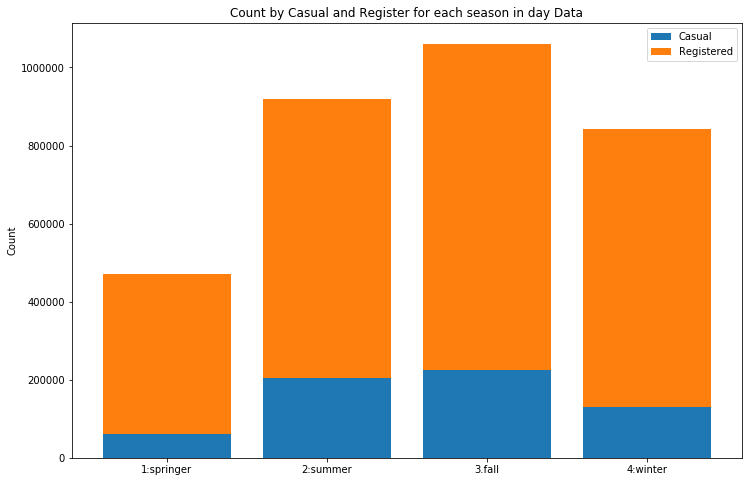

In [25]:
plot_stack_bar_chart(day, 'season', ('1:springer', '2:summer','3.fall', '4:winter'))

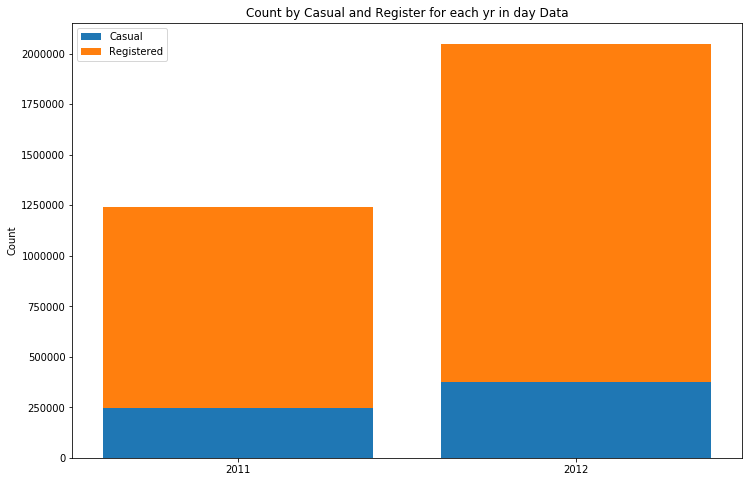

In [27]:
plot_stack_bar_chart(day,'yr',('2011','2012'))

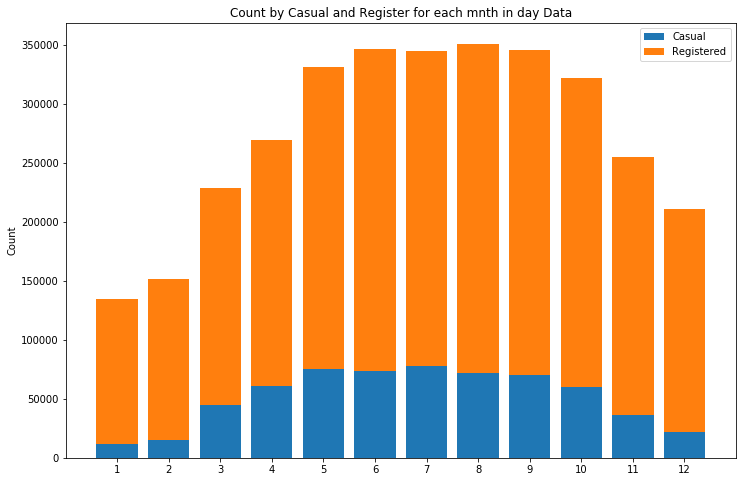

In [31]:
plot_stack_bar_chart(day,'mnth',[str(i) for i in day['mnth'].unique()])

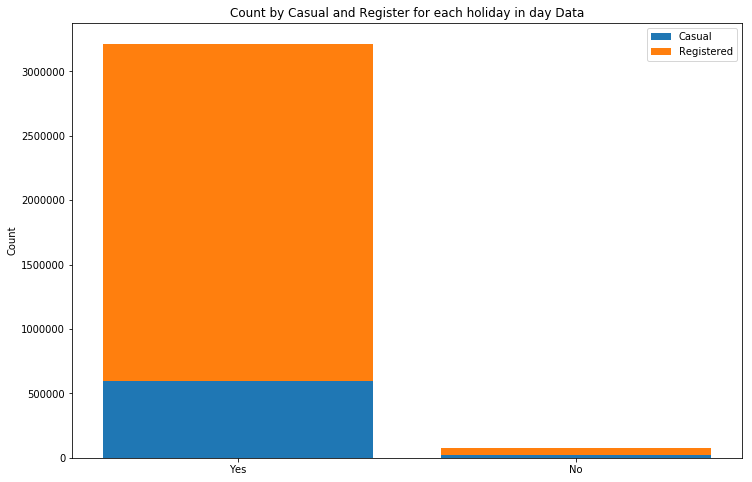

In [32]:
plot_stack_bar_chart(day,'holiday',('Yes',"No"))

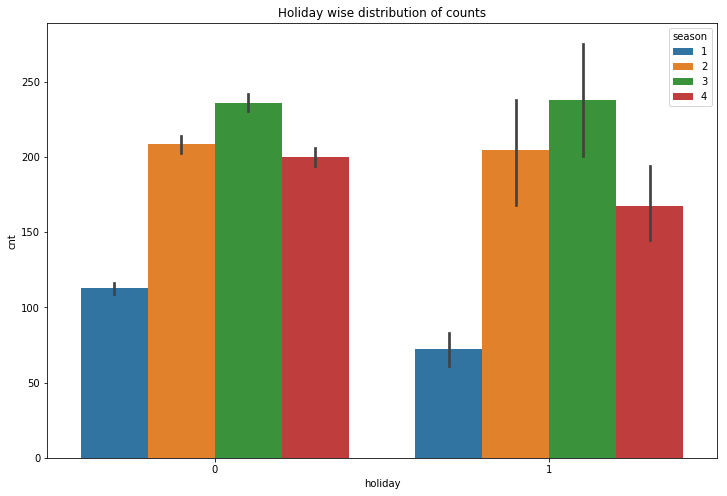

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x = hour['holiday'], y = hour['cnt'],hue= hour['season'])
plt.title('Holiday wise distribution of counts')
plt.show()